In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types , cut_dfs_generic_Vpi0eta

Welcome to JupyROOT 6.26/04


# DRAW with respect to generic bkg

In [2]:
base_file_loc = '/media/jykim/T7/storage/Ntuples_ghi/Generic_Ntuples/ref_pre_ref_only_skim/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'

In [36]:
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05'

variables=['D0_M','Dstarp_CMS_p','Dstarp_delM','Dstarp_isSignal']
#,'D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','Dstarp_flightDistance','Dstarp_flightDistanceErr','D0_flightDistance','D0_flightDistanceErr','Dstarp_chiProb']
# variables += ['dM_pi0_50MeV', 'dM_pi0_75MeV']

tree='ref_phi'

In [37]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [89]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)

[ 14655.  14741.  14916.  14823.  15045.  15388.  15019.  15044.  15199.
  14971.  14471.  14056.  13305.  12834.  12246.  11716.  11278.  11981.
  11677.  10504.   9291.   9200.   9809.  17299. 111695.  99267.  14179.
   7752.   7051.   6696.   6464.   6478.   6871.  10008.  19915.  24918.
  21314.  17944.  14955.  13309.  11997.  11110.  10525.   9910.   9365.
   8863.   8460.   7913.   7565.   7087.]
fitst_bin_entries=14655.0


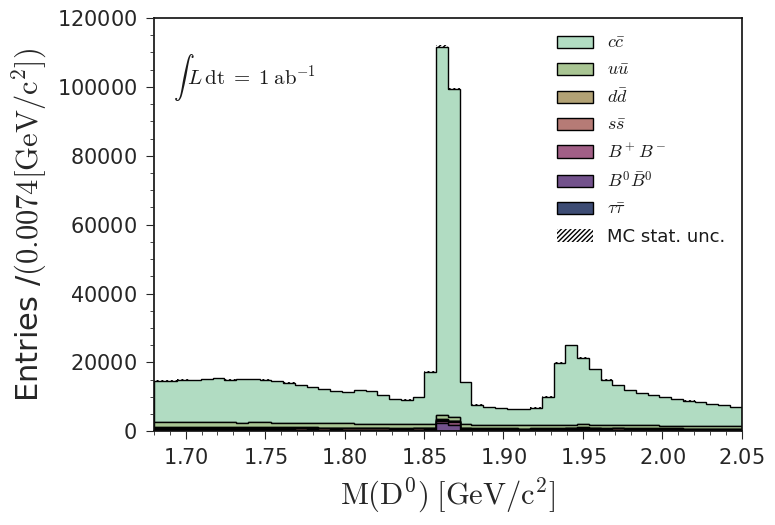

In [90]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)
# xrange = (1.75,2.0)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1,luminosity='$1\\; \\mathrm{ab}^{-1}$')

plt.tight_layout()
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/cut230828_pre_D0_M.png")

In [91]:
cut = 'gamma_E>0.0'
cut = 'dM_pi0_75MeV  > 0.023'
cut = 'D0_M>0.0'
# cut = 'abs((Dstarp_delM-0.1455))<0.0008 & Dstarp_CMS_p>2.5'

# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001  '
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[ 6170.  6150.  6547.  6470.  6301.  5900.  5497.  4981.  5086.  4900.
  5010.  5203.  5855.  8546. 23064. 70481. 86509. 35372. 10257.  5722.
  4338.  3985.  3791.  3720.  3580.  3679.  3427.  3530.  3431.  3530.
  3827.  4636.  6462.  9654. 12714. 13793. 12806. 11508. 10482.  9623.
  8603.  7893.  7421.  6996.  6611.  6343.  6003.  5905.  5687.  5553.]
fitst_bin_entries=6170.0


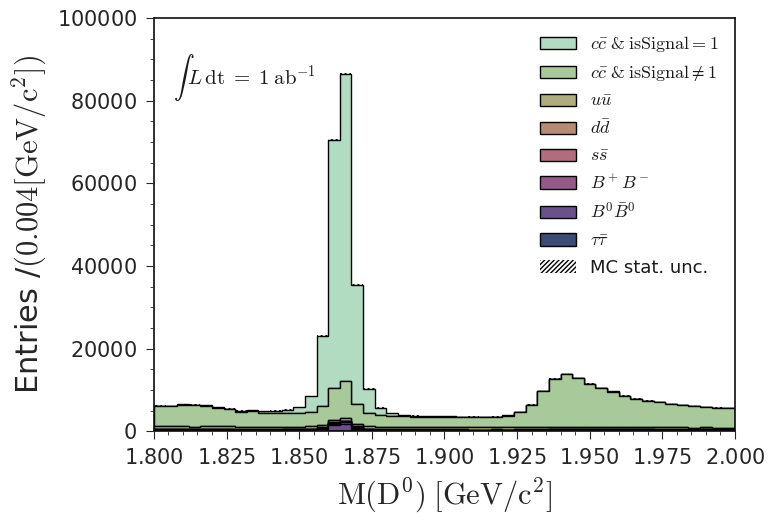

In [92]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'D0_M'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (1.68,2.05)
xrange = (1.8,2.0)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$', ncol=1)

plt.tight_layout()
plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/cut230828_pre_D0_M.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/cut230828_delMcut_DstarCMSpcut_D0_M_narrow_range.png")

[7.0000e+00 1.8030e+03 1.3404e+04 2.7667e+04 3.3497e+04 3.2891e+04
 3.1351e+04 3.0298e+04 2.9573e+04 2.8885e+04 2.8222e+04 2.7354e+04
 2.6882e+04 2.6393e+04 2.5730e+04 2.5374e+04 2.4353e+04 2.3896e+04
 2.3374e+04 2.2261e+04 2.1623e+04 2.1110e+04 2.0132e+04 1.9931e+04
 1.8880e+04 1.7826e+04 1.7403e+04 1.6600e+04 1.5643e+04 1.4789e+04
 1.4031e+04 1.3297e+04 1.2595e+04 1.1640e+04 1.0725e+04 1.0077e+04
 9.1110e+03 8.4090e+03 7.7210e+03 7.0560e+03 6.1140e+03 5.5240e+03
 4.6900e+03 4.0740e+03 3.4070e+03 2.5720e+03 1.7560e+03 8.3800e+02
 1.5000e+02 7.3000e+01]
fitst_bin_entries=7.0


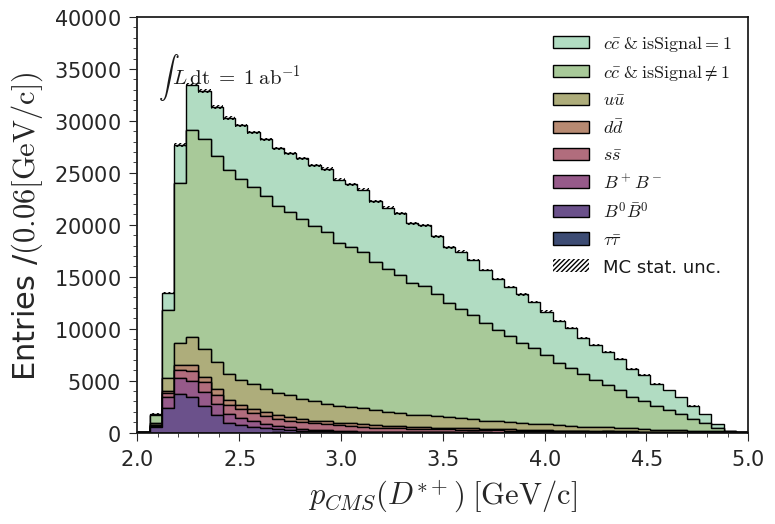

In [93]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'Dstarp_CMS_p'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (2, 5)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$p_{CMS}(D^{*+})$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c]",luminosity='$1\\; \\mathrm{ab}^{-1}$',ncol=1,force_range=xrange)
plt.tight_layout()
plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/cut230828_pre_Dstarp_CMS_p.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/cut230828_delMcut_Dstarp_CMS_p.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/cut230828_delMcut_DstarCMSpcut_Dstarp_CMS_p.png")




[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 1.00000e+00 1.50000e+03 3.53100e+03 5.07400e+03
 6.57300e+03 8.55500e+03 1.07040e+04 1.34030e+04 1.66070e+04 2.25160e+04
 3.32900e+04 4.57920e+04 1.63132e+05 1.00313e+05 4.19160e+04 3.31420e+04
 2.50970e+04 2.00110e+04 1.72020e+04 1.51480e+04 1.39760e+04 1.28140e+04
 1.20730e+04 1.14610e+04 1.08160e+04 1.05300e+04 1.00880e+04 9.84500e+03
 9.70600e+03 9.28900e+03 9.40000e+03 9.09900e+03 9.09100e+03 9.02200e+03
 8.81300e+03 8.88200e+03 8.92700e+03 8.68100e+03 8.60900e+03 8.16300e+03
 7.29800e+03 5.43900e+03]
fitst_bin_entries=0.0


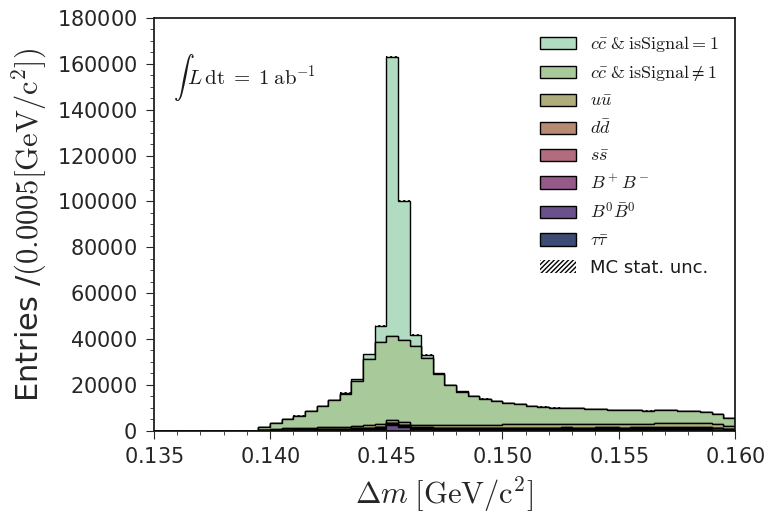

In [94]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c} \; & \;  \mathrm{isSignal}\neq 1$', r'$c\bar{c} \; & \; \mathrm{isSignal}=1$']
var = 'Dstarp_delM'
pd_signal = pd_ccbar.query('Dstarp_isSignal==1')
pd_notsignal = pd_ccbar.query('Dstarp_isSignal!=1')

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_notsignal[var], pd_signal[var]]  
scale = 1
xrange = (0.135,0.16)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\Delta m$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$', force_range=xrange,  ncol=1)
plt.tight_layout()
plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/cut230828_pre_Dstarp_delM.png")

[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 1.00000e+00 1.50000e+03 3.53100e+03 5.07400e+03
 6.57300e+03 8.55500e+03 1.07040e+04 1.34030e+04 1.66070e+04 2.25160e+04
 3.32900e+04 4.57920e+04 1.63132e+05 1.00313e+05 4.19160e+04 3.31420e+04
 2.50970e+04 2.00110e+04 1.72020e+04 1.51480e+04 1.39760e+04 1.28140e+04
 1.20730e+04 1.14610e+04 1.08160e+04 1.05300e+04 1.00880e+04 9.84500e+03
 9.70600e+03 9.28900e+03 9.40000e+03 9.09900e+03 9.09100e+03 9.02200e+03
 8.81300e+03 8.88200e+03 8.92700e+03 8.68100e+03 8.60900e+03 8.16300e+03
 7.29800e+03 5.43900e+03]
fitst_bin_entries=0.0


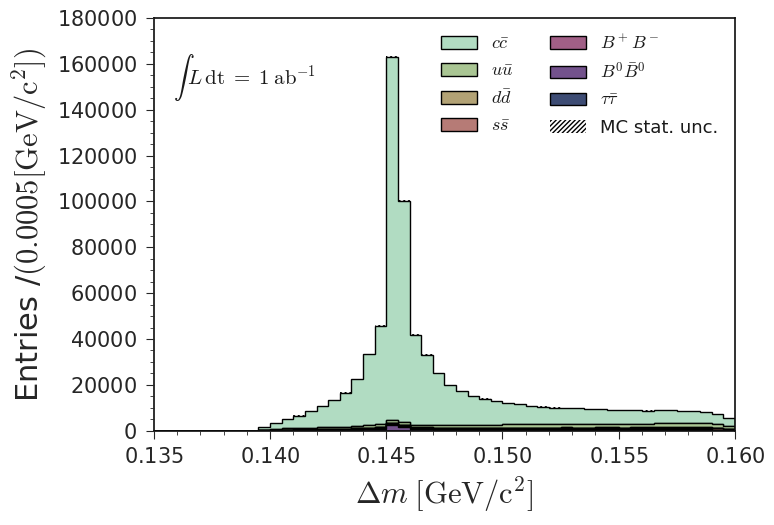

In [35]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
xrange = (0.135,0.16)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\Delta m$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity='$1\\; \\mathrm{ab}^{-1}$' , force_range=xrange)

# DRAW with respect to TopoAna(to be changed)

In [29]:
base_file_loc = '/media/jykim/T7/storage/01_recon/massveto_calib_0614_calib_skim/'


# phigamma_ccbar = base_file_loc + 'ccbar/recon_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
phigamma_ccbar = base_file_loc + 'topo/resultfile/result_kshort/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_*.root'
phigamma_charged = base_file_loc + 'charged/recon_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_*.root'

In [38]:
# base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Rho_M - 0.77526 ) < 0.15 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05'

variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','Dstarp_flightDistance','Dstarp_flightDistanceErr','D0_flightDistance','D0_flightDistanceErr','Dstarp_chiProb']
variables += ['dM_pi0_50MeV', 'dM_pi0_75MeV']

topo_variables = variables +['nSigCascDcyBr_0','nSigCascDcyBr_1' ,'nSigCascDcyBr_2','nSigCascDcyBr_3']

tree='kshort'

In [39]:
pd_phigamma_ccbar_topo = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=topo_variables)
pd_phigamma_uubar_topo = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar_topo = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar_topo = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged_topo = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed_topo = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair_topo = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [102]:
pd_ccbar_topo = pd_phigamma_ccbar_topo.reset_index(drop=True)
pd_uubar_topo = pd_phigamma_uubar_topo.reset_index(drop=True)
pd_ddbar_topo = pd_phigamma_ddbar_topo.reset_index(drop=True)
pd_ssbar_topo = pd_phigamma_ssbar_topo.reset_index(drop=True)
pd_charged_topo = pd_phigamma_charged_topo.reset_index(drop=True)
pd_mixed_topo = pd_phigamma_mixed_topo.reset_index(drop=True)
pd_taupair_topo = pd_phigamma_taupair_topo.reset_index(drop=True)

In [103]:
pd_ccbar_Vpi0 = pd_ccbar_topo.query('nSigCascDcyBr_0==1')
pd_ccbar_Veta = pd_ccbar_topo.query('nSigCascDcyBr_1==1')

[1340. 1423. 1483. 1671. 1790. 1781. 1849. 2033. 2162. 2218. 2370. 2443.
 2566. 2817. 2966. 3251. 3415. 3815. 4141. 4429. 4446. 4230. 3715. 3048.
 2226. 1342.  767.  450.  281.  199.  211.  184.  155.  155.  150.  149.
  161.  169.  123.  131.  134.  151.  132.  143.  128.  123.  133.  143.
  134.  129.]
fitst_bin_entries=1340.0


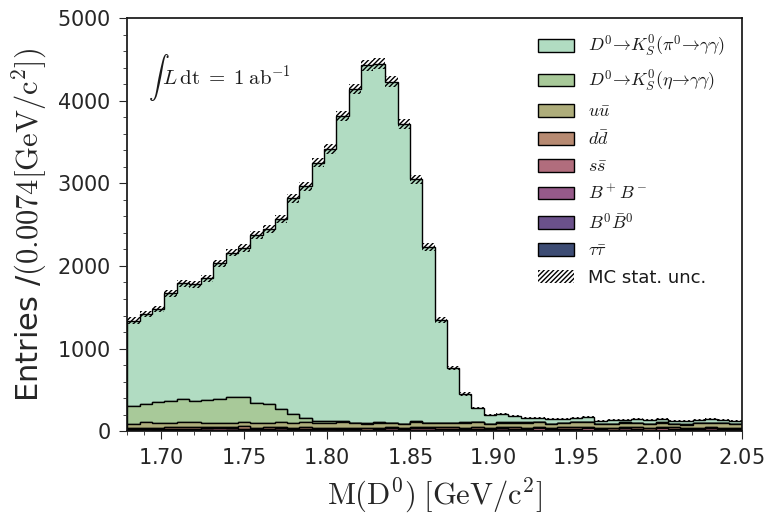

In [104]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$D^0 \to K_S^0 (\eta\to \gamma \gamma)$', r'$D^0 \to K_S^0 (\pi^0\to \gamma \gamma)$']
var = 'D0_M'
data  = [pd_taupair_topo[var], pd_mixed_topo[var], pd_charged_topo[var],pd_ssbar_topo[var], pd_ddbar_topo[var],pd_uubar_topo[var], pd_ccbar_Veta[var], pd_ccbar_Vpi0[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1, luminosity="$1\; \mathrm{ab}^{-1}$")
plt.savefig('MC15ri_kshortg_D0_M_before.png')

In [105]:
cut = 'gamma_E>0.0'
cut = 'dM_pi0_75MeV  > 0.023'

# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001  '
pd_ccbar_Vpi0, pd_ccbar_Veta, pd_uubar_topo,pd_ddbar_topo,pd_ssbar_topo,pd_charged_topo, pd_mixed_topo, pd_taupair_topo = cut_dfs_generic_Vpi0eta(cut, pd_ccbar_Vpi0, pd_ccbar_Veta, pd_uubar_topo,pd_ddbar_topo,pd_ssbar_topo,pd_charged_topo, pd_mixed_topo, pd_taupair_topo)

[ 405.  438.  458.  532.  558.  579.  603.  676.  721.  784.  798.  861.
  885.  950. 1078. 1286. 1467. 1802. 2132. 2604. 2863. 2995. 2840. 2386.
 1847. 1080.  596.  311.  172.  111.  117.   84.   67.   73.   67.   56.
   73.   70.   59.   47.   59.   54.   46.   58.   45.   49.   50.   45.
   51.   39.]
fitst_bin_entries=405.0


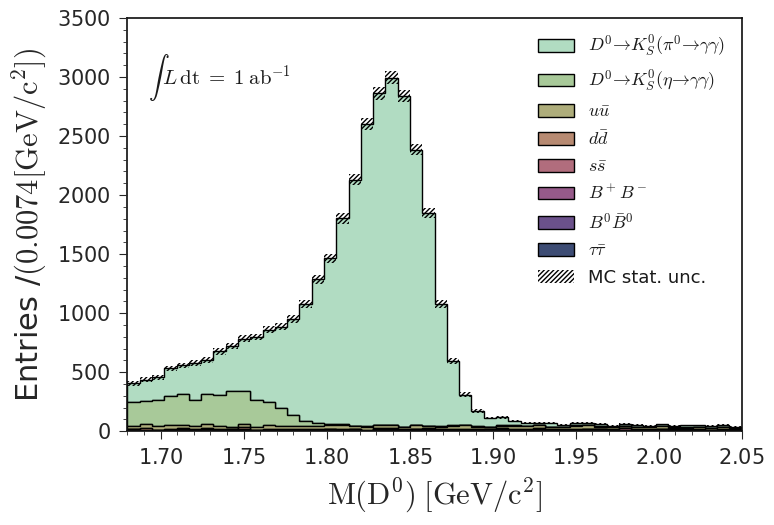

In [106]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$D^0 \to K_S^0 (\eta\to \gamma \gamma)$', r'$D^0 \to K_S^0 (\pi^0\to \gamma \gamma)$']
var = 'D0_M'
data  = [pd_taupair_topo[var], pd_mixed_topo[var], pd_charged_topo[var],pd_ssbar_topo[var], pd_ddbar_topo[var],pd_uubar_topo[var], pd_ccbar_Veta[var], pd_ccbar_Vpi0[var]]  
scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1, luminosity="$1\; \mathrm{ab}^{-1}$")
plt.savefig('MC15ri_kshortg_D0_M_after.png')

In [ ]:
nSigCascDcyBr_0